# Project: Investigate a Dataset (Gapminder World Economic Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project I will be analyzing economic datasets downloaded from the Gapminder website (https://www.gapminder.org/data/) on 27th September 2020 to analyze trends resulting from growing prosperity of different countries. Different variables for measurement will be used, which are:
* Electricity use per person
* Income per Capita (PPP)
* Gross Domestic Product (GDP, measured as PPP)

<b>About PPP</b><br>
PPP stands for Purchasing Power Parity and is a form of economic measurement of prices of goods and services in different countries. It is used as a metric to compare economic productivity and standards of living between countries (https://www.investopedia.com/updates/purchasing-power-parity-ppp/)

<b>We will be answering the following questions in our data exploration:</b><br>
* Have certain countries of the world been growing in the selected metrics better than others?
* How has income growth differed between the two major developing economies, China and India?
* Is there a correlation between rising per capita income levels and electricity usage per person?

<b>Note:</b><br>
Originally, a total of six variables were considered for the analysis, however due to lack of sufficient data the analysis has been reduced to just the three mentioned above.

The Data Wrangling section includes the wrangling of the additional variables as well, I've kept these intact only for reference and historical reasons. Prior to the Exploratory Data Analysis, the unused variables are dropped off.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Read in the datasets

# GDP by Purchasing Power Parity (PPP)
df_gdp = pd.read_csv("total_gdp_ppp_inflation_adjusted.csv")
# Citizen Income Per Capita $ Purchasing Power Parity (PPP)
df_income = pd.read_csv("income_per_person_gdppercapita_ppp_inflation_adjusted.csv")
# Electricity consumption per person
df_electricity = pd.read_csv("electricity_use_per_person.csv")
# Number of cellphones owned per 100 people
df_cellphones = pd.read_csv("cell_phones_per_100_people.csv")
# % of internet users by country
df_internet = pd.read_csv("internet_users.csv")
# Total annual oil consumption per country
df_oil = pd.read_csv("oil_consumption_total.csv")

In [4]:
# Let's take a look at how the GDP by Purchasing Power Parity dataset is looking like
# It's worth noting that the columns/format is the same for all the 6 datasets
df_gdp.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,2.080000e+09,...,2.890000e+10,3.240000e+10,3.390000e+10,3.850000e+10,3.950000e+10,4.750000e+10,5.130000e+10,5.490000e+10,6.300000e+10,6.580000e+10
1,Albania,3.260000e+08,3.270000e+08,3.280000e+08,3.300000e+08,3.310000e+08,3.320000e+08,3.340000e+08,3.350000e+08,3.370000e+08,...,2.110000e+10,2.230000e+10,2.350000e+10,2.490000e+10,2.670000e+10,2.760000e+10,2.850000e+10,2.930000e+10,3.010000e+10,3.070000e+10
2,Algeria,3.810000e+09,3.820000e+09,3.830000e+09,3.850000e+09,3.860000e+09,3.870000e+09,3.890000e+09,3.900000e+09,3.920000e+09,...,3.720000e+11,3.920000e+11,3.990000e+11,4.130000e+11,4.210000e+11,4.280000e+11,4.430000e+11,4.540000e+11,4.650000e+11,4.790000e+11
3,Andorra,3.340000e+06,3.350000e+06,3.360000e+06,3.360000e+06,3.370000e+06,3.370000e+06,3.380000e+06,3.380000e+06,3.390000e+06,...,2.820000e+09,3.040000e+09,3.190000e+09,3.190000e+09,3.060000e+09,2.900000e+09,2.810000e+09,2.730000e+09,NaN,NaN
4,Angola,1.020000e+09,1.020000e+09,1.030000e+09,1.030000e+09,1.040000e+09,1.040000e+09,1.050000e+09,1.050000e+09,1.050000e+09,...,6.310000e+10,7.610000e+10,9.020000e+10,1.110000e+11,1.270000e+11,1.300000e+11,1.340000e+11,1.390000e+11,1.460000e+11,1.520000e+11


In [5]:
# Let's take a look at a different dataset, such as for the Total Oil Consumption
df_oil.head()

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Algeria,1290000.0,1690000.0,1580000.0,1680000.0,1780000.0,2030000.0,2290000.0,2510000.0,2740000.0,...,12900000,14000000,14900000,14800000,15800000,16800000,17600000,17700000,19500000,18900000
1,Argentina,22100000.0,22800000.0,23300000.0,23800000.0,24700000.0,22100000.0,23600000.0,23600000.0,23700000.0,...,24200000,24900000,24300000,28100000,28300000,29600000,31900000,31300000,32200000,31900000
2,Australia,15100000.0,18000000.0,19700000.0,21500000.0,22100000.0,24400000.0,25700000.0,26100000.0,27900000.0,...,42500000,43200000,43500000,43700000,46300000,47900000,48200000,48100000,47900000,47800000
3,Austria,5560000.0,6120000.0,6510000.0,7540000.0,8280000.0,9100000.0,10200000.0,11000000.0,11900000.0,...,13400000,13400000,12800000,13400000,12700000,12500000,12700000,12500000,12500000,12700000
4,Azerbaijan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4520000,3590000,3310000,3220000,3990000,4170000,4540000,4450000,4530000,4610000


### Initial Observations
So, as we've seen that some countries and years has missing data. This could be attributed to the fact that data was either not available, or collected for a particular country in a year. For example, the internet was not prevalent before year 1990, therefore for majority of the countries (exclusion of the USA as the internet was invented there) the data is missing.

We will now use the Melt function across ALL datasets to reshape the data into a structure that's easier to analyze.

In [6]:
# Measures the Total Country GDP (in PPP)
# Using Melt to reshape the data to show country in the first column, followed by the year and GDP
df_gdp2 = pd.melt(df_gdp, id_vars="country", var_name="year", value_name="gdp")
df_gdp2

,country,year,gdp
0,Afghanistan,1800,2.080000e+09
1,Albania,1800,3.260000e+08
2,Algeria,1800,3.810000e+09
3,Andorra,1800,3.340000e+06
4,Angola,1800,1.020000e+09
...,...,...,...
41511,Venezuela,2013,5.320000e+11
41512,Vietnam,2013,4.650000e+11
41513,Yemen,2013,1.090000e+11
41514,Zambia,2013,4.400000e+10


In [7]:
# Measures the Income Per Capita (in PPP)
# Using Melt to reshape the data to show country in the first column, followed by the year and income
df_income2 = pd.melt(df_income, id_vars="country", var_name="year", value_name="income")
df_income2

,country,year,income
0,Afghanistan,1800,603
1,Albania,1800,667
2,Algeria,1800,715
3,Andorra,1800,1200
4,Angola,1800,618
...,...,...,...
46508,Venezuela,2040,9880
46509,Vietnam,2040,14400
46510,Yemen,2040,3870
46511,Zambia,2040,4180


In [9]:
# Measures electricity use Per Person
# This measures the electricity production of power plants and combined heat (i.e. energy not lost during transmission)
# Using Melt to reshape the data to show country in the first column, followed by the year and electricity consumption
df_electricity2 = pd.melt(df_electricity, id_vars="country", var_name="year", value_name="electricity_consumption")
df_electricity2

,country,year,electricity_consumption
0,Albania,1960,NaN
1,Algeria,1960,NaN
2,Angola,1960,NaN
3,Argentina,1960,NaN
4,Armenia,1960,NaN
...,...,...,...
7585,Venezuela,2014,2720.0
7586,Vietnam,2014,1420.0
7587,Yemen,2014,220.0
7588,Zambia,2014,717.0


In [10]:
# Measures the number of Cell Phone subscriptions (per 100 people)
# This is referring to the number of cell phone subscriptions
# Using Melt to reshape the data to show country in the first column, followed by the year and number of cellphones
df_cellphones2 = pd.melt(df_cellphones, id_vars="country", var_name="year", value_name="no_of_cellphones")
df_cellphones2

,country,year,no_of_cellphones
0,Afghanistan,1960,0.0
1,Albania,1960,0.0
2,Algeria,1960,0.0
3,Andorra,1960,0.0
4,Angola,1960,0.0
...,...,...,...
11441,Venezuela,2018,71.8
11442,Vietnam,2018,147.0
11443,Yemen,2018,53.7
11444,Zambia,2018,89.2


In [11]:
# This measures the total % of the country population that have an active internet connection
# Using Melt to reshape the data to show country in the first column, followed by the year and % of internet users
# by country
df_internet2 = pd.melt(df_internet, id_vars="country", var_name="year", value_name="percent_internet_users")
df_internet2

,country,year,percent_internet_users
0,Afghanistan,1960,NaN
1,Albania,1960,NaN
2,Algeria,1960,NaN
3,Andorra,1960,NaN
4,Angola,1960,NaN
...,...,...,...
11441,Venezuela,2018,NaN
11442,Vietnam,2018,70.3
11443,Yemen,2018,NaN
11444,Zambia,2018,14.3


In [14]:
# Measures the total amount of crude Oil consumption in tonnes
# Using Melt to reshape the data to show country in the first column, followed by the year and % of internet users
# by country
df_oil2 = pd.melt(df_oil, id_vars="country", var_name="year", value_name="oil_consumption")
df_oil2

,country,year,oil_consumption
0,Algeria,1965,1290000.0
1,Argentina,1965,22100000.0
2,Australia,1965,15100000.0
3,Austria,1965,5560000.0
4,Azerbaijan,1965,NaN
...,...,...,...
3375,United Kingdom,2016,73100000.0
3376,United States,2016,863000000.0
3377,Uzbekistan,2016,2760000.0
3378,Venezuela,2016,28700000.0


### Merge the datasets into one
Here, I've used the merge function to merge all the datasets into one dataframe.
We will now have a single country and year column, followed by the different dimensions we'd like to compare.

I did refer to this Stackoverflow page for assistance:
https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes

In [15]:
# Dataframes to merge
frames = [df_gdp2, df_income2, df_electricity2, df_cellphones2, df_internet2, df_oil2]
df_merged = reduce(lambda left, right: pd.merge(left, right, on=['country','year'], how='outer'), frames)

# We will filter our dataframe to only show data between the period of 1965 to 2013, inclusive. This was the range that the
# least amount of missing data was observed.
df_merged = df_merged[ (df_merged.year >= '1965') & (df_merged.year <= '2013')]
df_merged.sort_values(by=['country', 'year'], ascending=(True, True), inplace=True)

# Save output for reference
df_merged.to_csv("output.csv")
df_merged.head()

,country,year,gdp,income,electricity_consumption,no_of_cellphones,percent_internet_users,oil_consumption
32010,Afghanistan,1965,1.220000e+10,2640.0,NaN,0.0,NaN,NaN
32204,Afghanistan,1966,1.220000e+10,2600.0,NaN,NaN,NaN,NaN
32398,Afghanistan,1967,1.260000e+10,2600.0,NaN,NaN,NaN,NaN
32592,Afghanistan,1968,1.300000e+10,2620.0,NaN,NaN,NaN,NaN
32786,Afghanistan,1969,1.310000e+10,2590.0,NaN,NaN,NaN,NaN


In [16]:
# Let's do some analysis here on the merged dataframe
# Find info about the rows/columns
# We have 9506 rows across 8 columns
df_merged.shape

(9506, 8)

In [17]:
# Find column data info for the merged dataframe
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9506 entries, 32010 to 41515
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  9506 non-null   object 
 1   year                     9506 non-null   object 
 2   gdp                      9484 non-null   float64
 3   income                   9457 non-null   float64
 4   electricity_consumption  5483 non-null   float64
 5   no_of_cellphones         7616 non-null   float64
 6   percent_internet_users   3982 non-null   float64
 7   oil_consumption          3019 non-null   float64
dtypes: float64(6), object(2)
memory usage: 668.4+ KB


In [18]:
# Drop No of Cellphones, % Internet Users, Oil Consumption due to insufficient data available to allow for 
# meaningful data fill
df_merged.drop(['no_of_cellphones', 'percent_internet_users','oil_consumption'], axis=1, inplace=True)
df_merged

,country,year,gdp,income,electricity_consumption
32010,Afghanistan,1965,1.220000e+10,2640.0,NaN
32204,Afghanistan,1966,1.220000e+10,2600.0,NaN
32398,Afghanistan,1967,1.260000e+10,2600.0,NaN
32592,Afghanistan,1968,1.300000e+10,2620.0,NaN
32786,Afghanistan,1969,1.310000e+10,2590.0,NaN
...,...,...,...,...,...
40739,Zimbabwe,2009,1.400000e+10,1630.0,585.0
40933,Zimbabwe,2010,1.530000e+10,1930.0,607.0
41127,Zimbabwe,2011,1.680000e+10,2170.0,636.0
41321,Zimbabwe,2012,1.850000e+10,2490.0,609.0


### Data Cleaning

We can see above that we have a large discrepancy between the different dimensions of missing data. Since we have missing data in-between some years for some dimensions, let's interpolate for the years between and extrapolate for the years outside the range for which we have available observations - on a per country basis.

<b>Reference:</b> https://towardsdatascience.com/using-pandas-transform-and-apply-to-deal-with-missing-data-on-a-group-level-cb6ccf060531

The data looks good otherwise.

In [238]:
# Fill in empty cells
# Define helper function
def fill_missing(grp):
    res = grp.set_index('year')\
    .interpolate(method='linear',limit=5)\
    .fillna(method='ffill')\
    .fillna(method='bfill')
    del res['country']
    return res
    
# Group by country name and fill missing
df = df_merged.groupby(['country']).apply(
    lambda grp: fill_missing(grp)
)
df = df.reset_index()

# Drop rows with empty data and save to a new dataframe
df = df.dropna()

# Save dataframe to csv
df.to_csv("output_clean.csv")

# View the cleaned data with empty values filled for which observations exist on a per-country basis
df.head()

,country,year,gdp,income,electricity_consumption
49,Albania,1965,6.330000e+09,2990.0,532.0
50,Albania,1966,6.750000e+09,3100.0,532.0
51,Albania,1967,7.200000e+09,3220.0,532.0
52,Albania,1968,7.660000e+09,3330.0,532.0
53,Albania,1969,8.120000e+09,3440.0,532.0


In [31]:
# Now let's do some analysis to learn more about the data in our final dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6762 entries, 49 to 9505
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  6762 non-null   object 
 1   year                     6762 non-null   object 
 2   gdp                      6762 non-null   float64
 3   income                   6762 non-null   float64
 4   electricity_consumption  6762 non-null   float64
dtypes: float64(3), object(2)
memory usage: 317.0+ KB


,gdp,income,electricity_consumption
count,6.762000e+03,6762.000000,6762.000000
mean,3.601135e+11,15062.996747,2939.386899
std,1.150131e+12,19456.906979,4158.151598
min,6.290000e+08,312.000000,5.760000
25%,1.920000e+10,3600.000000,312.000000
50%,5.850000e+10,8600.000000,1470.000000
75%,2.360000e+11,19100.000000,4020.000000
max,1.640000e+13,179000.000000,54800.000000


We can observe that now we have no rows where we have missing data. Let's take a look at the Histogram to get a better idea of our data.

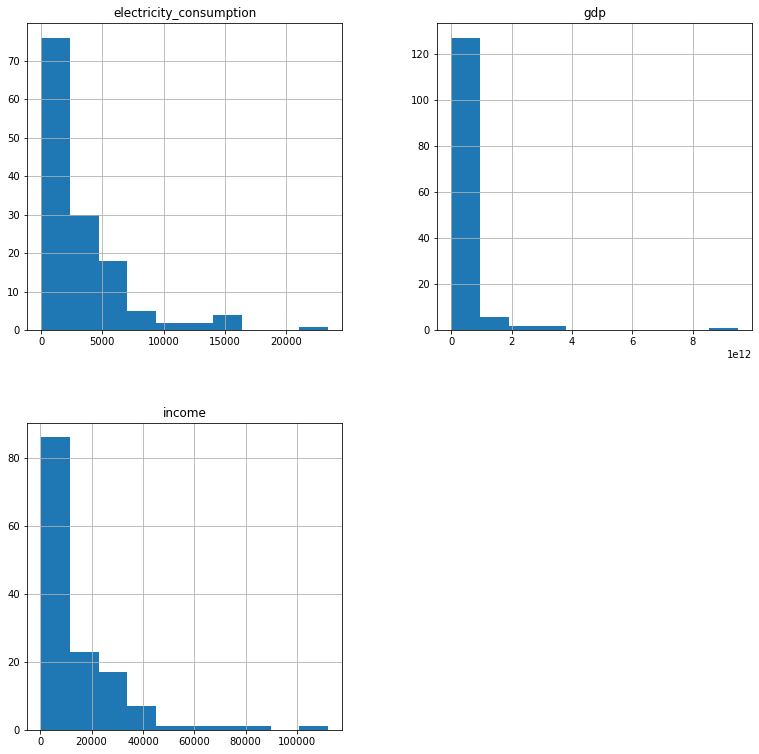

In [32]:
# Histogram for ALL the data in the year 1990
df[df['year'] == '1990'].hist(figsize=(13,13));

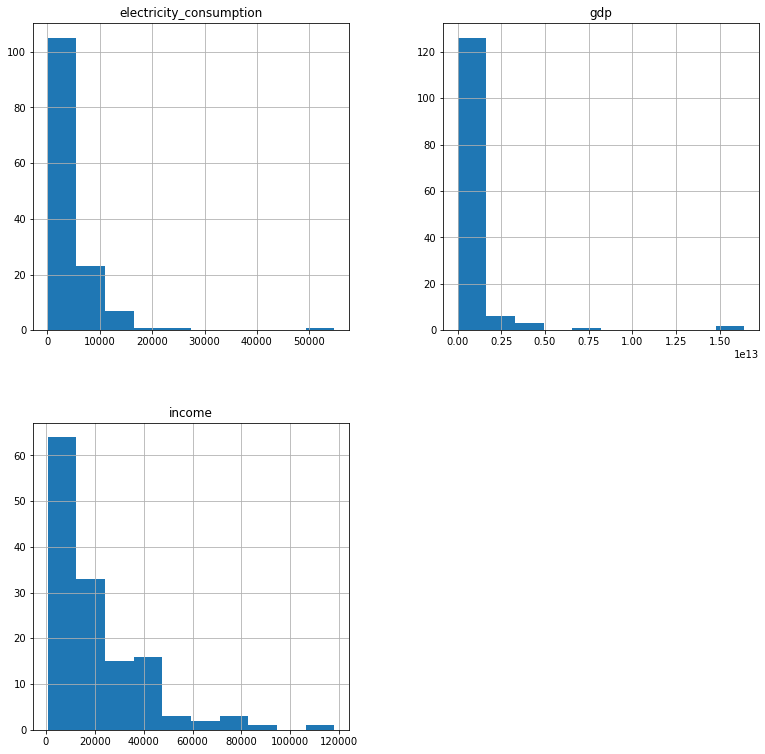

In [33]:
# Histogram for ALL the data in the year 2013
df.loc[df['year'] == '2013'].hist(figsize=(13,13));

In [34]:
# Show the 1st, 2nd and 3rd Quartiles of the dataset in the year 1990
df[df['year'] == '1990'].quantile([0.25,0.5,0.75])

,gdp,income,electricity_consumption
0.25,2.077500e+10,3622.5,362.75
0.50,6.015000e+10,8645.0,1385.00
0.75,2.497500e+11,20150.0,4307.50


In [35]:
# Show the 1st, 2nd and 3rd Quartiles of the dataset in the year 2013
df[df['year'] == '2013'].quantile([0.25,0.5,0.75])

,gdp,income,electricity_consumption
0.25,3.687500e+10,5477.5,766.5
0.50,1.390000e+11,14400.0,2505.0
0.75,4.550000e+11,28200.0,5395.0


### Some observations from the Histogram and Quartiles
#### Income Per Capita
We can see that in the year 1990 and 2013, the Income is heavily skewed to the right. In the year 2013, up to 75% of the data available shows an Income Per Capita equal to, or less than $41,000. The data suggests that only a small number of countries across the world enjoy a high income in the top 25%. 

#### GDP in Purchasing Power Parity
The GDP is also skewed to the right, indicating that economic prosperity is limited to only a handful of countries when compared with the rest of the world. 

It's worth mentioning that countries can have a high Income Per Capita but a comparatively lower GDP owing to the country's lower population and higher standard of living.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Have certain countries of the world been growing in the selected metrics better than others?)
We will explore the economic growth of China, India, Japan with respect to the United States and the time period between 1965 and 2013 (note: pending data availability)

Out of all these three Asian countries the expectation is that the data models:
* The rapid economic growth of Japan to be one of the world's fastest growing economies in the 1970's and 1980's
* The economic stagnation of Japan during the period known as 'The Lost Decade', this is the period between 1991 to 2001, cause by the Japanese Asset Bubble.
* The economic rise of China from 1978 onwards due to economic reforms started by the then chairman of the Chinese Communist Party, Deng Xiaoping.
* The economic rise of India from the 1990's started by the then Prime Minister Narishma Rao and Finance Minister Manmohan Singh.

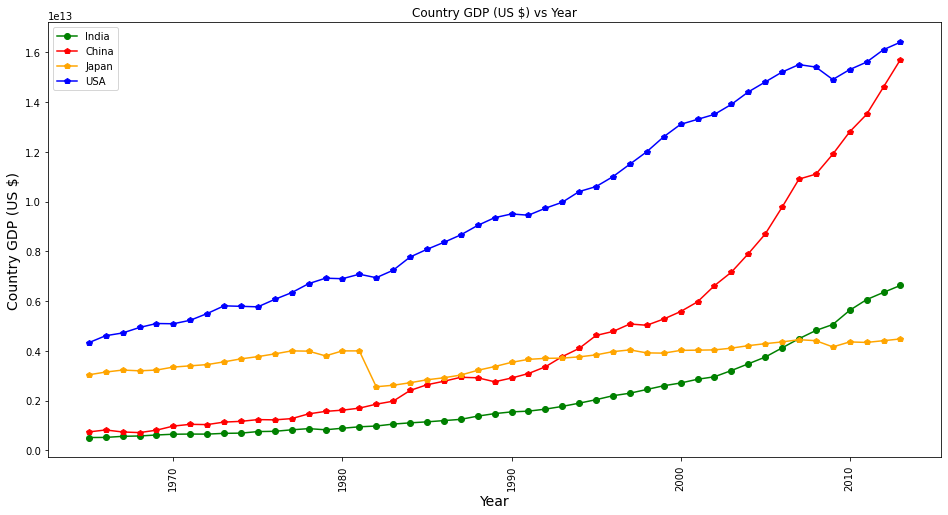

,country,year,gdp,income,electricity_consumption
9109,United States,2009,1.490000e+13,48600.0,12900.0


In [182]:
# Set Matplotlib Figure Size
plt.rcParams["figure.figsize"] = (16,8)

# Countries for comparison
india = df.query('country == "India" & year >= "1965"')
china = df.query('country == "China" & year >= "1965"')
japan = df.query('country == "Japan" & year >= "1965"')
usa = df.query('country == "United States" & year >= "1965"')


country_labels = ['India', 'China', 'Japan', 'USA']
year = np.arange(1965, 2014)

plt.plot(year, india.gdp, color='green', marker='o')
plt.plot(year, china.gdp, color='red', marker='p')
plt.plot(year, japan.gdp, color='orange', marker='p')
plt.plot(year, usa.gdp, color='blue', marker='p')

plt.title("Country GDP (US $) vs Year")
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=90)
plt.ylabel("Country GDP (US $)", fontsize=14)
plt.legend(country_labels)

plt.show()

df.query('country == "United States" & year == "2009"')
#df.query('country == "India" & year == "2013"')

#### Research Question 1 Analysis
This graph highlights in detail the economic performance between these four countries over the past few decades since 1965.

##### Japan
We can see that in the year 1965, Japan's economy was around 70.2% the size of the United States, Japan experienced a drop in 1982 and went through a painful Asset Price Bubble, this is termed as The Lost Decade and occurred during the period from 1991 to 2001. We can see that the economic levels would not see the level it was in 1981 until the year 2000, almost 20 years later, at around $4 Trillion.

#### China and India
From 1965 up to 1980 we can see that the economic performance of both China and India were almost the same. The Chinese economic reforms started in 1978 and resulted an uptick in GDP growth. Only 5 years later in 1985, China's GDP was slightly more than twice that of India's at $264 Billion.

China surpassed Japan as the world's 2nd largest economy (measured in PPP) in 1993. China saw an increase in growth after joining the World Trade Organization in 2001, we can see on the graph that the curve depicting China has a steeper positive gradient.

In contrast, India's growth has been more modest and has not experienced the fast bursts of growth China had enjoyed. India would not match China's economy of $6.63 Trillion in 2002 until 2013, 11 years later.

#### United States
The United States has remained the world's largest economy, based on the given data, from 1965 to 2013. We can see that The World Trade Centre terrorist attacks in 2001 did not affect the US economy, however the Global Financial Crisis, which began in 2007 and lasted until 2009 caused an overall contraction in the US GDP by 3.87 percent, the economy dropped from $15.5 Trillion to $14.9 Trillion during this period. The US would not achieve its pre-recession levels until 2011.



### Research Question 2  (How has income growth differed between the two major developing economies, China and India?)
In this question we're going to be focussing on the two fastest growing economies in the world, India and China.
We will be comparing the income between the two countries and try to understand how the changes came about using the given data.

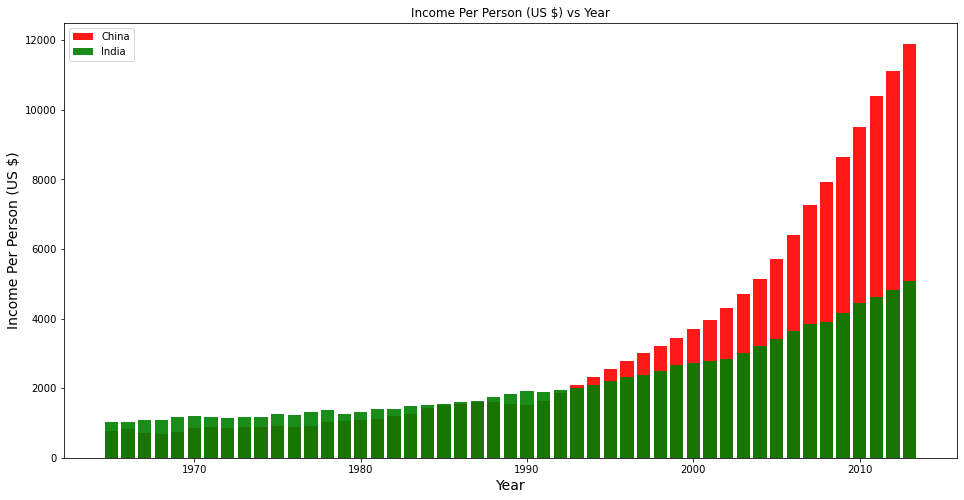

In [236]:
# Countries for comparison
india = df.query('country == "India" & year >= "1965"')
china = df.query('country == "China" & year >= "1965"')

country_labels = ['China', 'India']
year = np.arange(1965, 2014)

plt.bar(year, china.income, color='red',  alpha=0.9)
plt.bar(year, india.income, color='green', alpha=0.9)

plt.title("Income Per Person (US $) vs Year")
plt.xlabel("Year", fontsize=14)

plt.ylabel("Income Per Person (US $)", fontsize=14)
plt.legend(country_labels)

plt.show()

#### Research Question 2 Analysis
The bar graph highlights how the Income Per Capita in PPP has changed over time between China and India, which are the fastest growing developing economies.

For both China and India we can see a positive trend in the rise of income levels, this is consistent with the exponential growth in the economies of both nations.

It's interesting to note that based on the given data, from 1965 to 1992 (27 years), a person living in India was financially well off when compared with someone from China. However, from 1993 onwards as can be seen the Income Per Capita in China far outweighted India's. This suggests that as the Chinese econonmy grew faster, a person living in China experienced increased levels of wealth.

### Research Question 3  (Is there a correlation between rising per capita income levels and electricity usage per person?)
In this question, we're going to be exploring if the electricity consumption of an individual increases if their income level increases. This could be due to that increased wealth results in more electricity-consuming material goods being purchased.

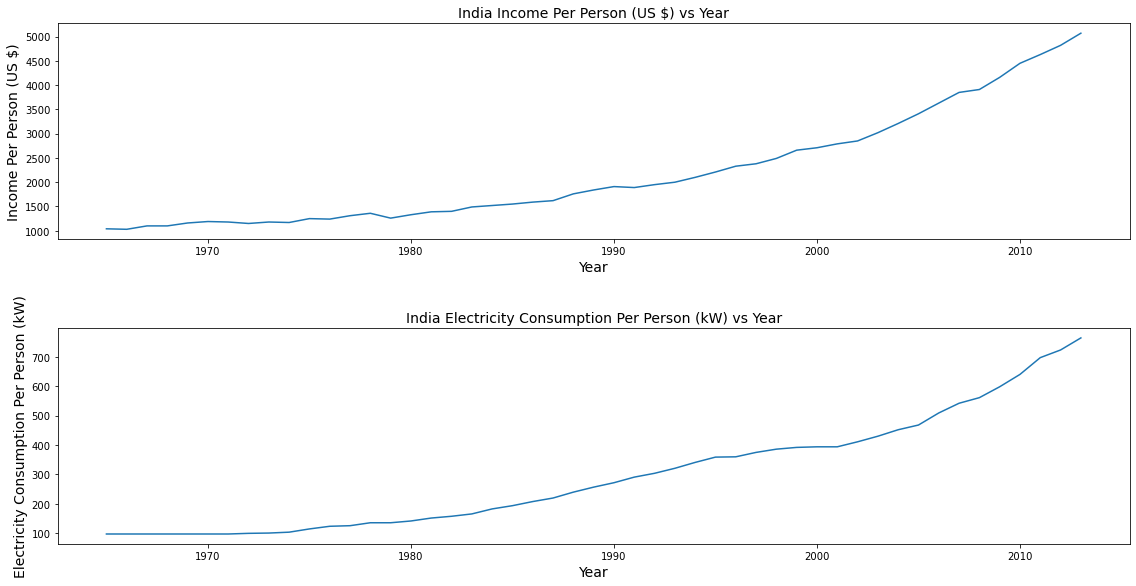

In [233]:
# Produce a 1D array of 2 subplots
fig, a = plt.subplots(2)

# Define the x-axis
x = np.arange(1965, 2014)
# Define attributes for the first subplot
a[0].plot(x, india.income)
a[0].set_title("India Income Per Person (US $) vs Year", fontsize=14)
a[0].set_xlabel("Year", fontsize=14)
a[0].set_ylabel("Income Per Person (US $)", fontsize=14)

# Add spacing between subplots
fig.tight_layout(h_pad=5)

# Define attributes for the second subplot
a[1].plot(x, india.electricity_consumption)
a[1].set_title("India Electricity Consumption Per Person (kW) vs Year", fontsize=14)
a[1].set_xlabel("Year", fontsize=14)
a[1].set_ylabel("Electricity Consumption Per Person (kW)", fontsize=14)

plt.show()

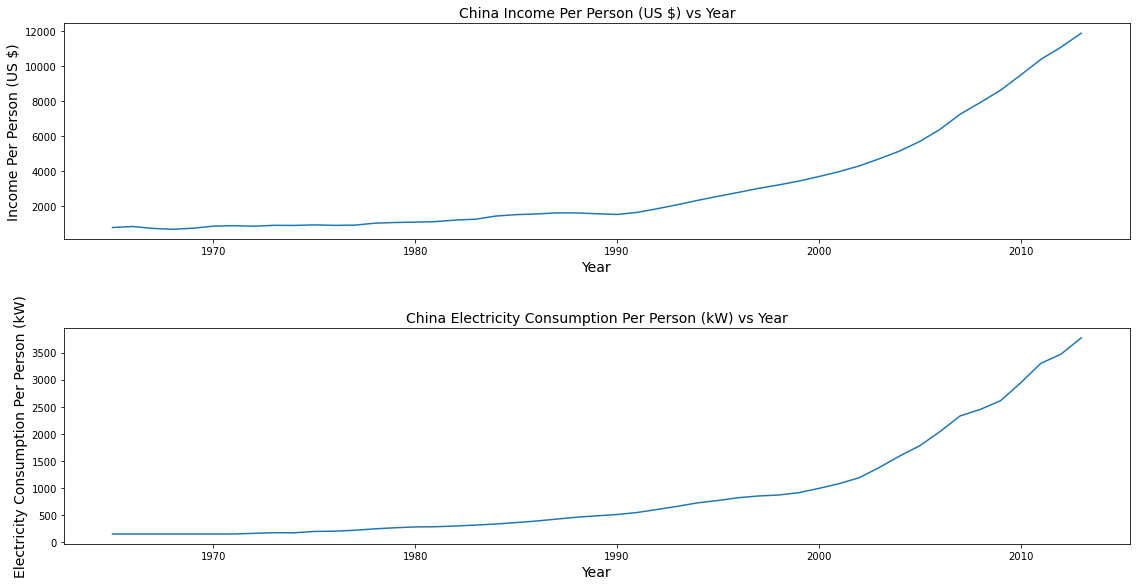

In [235]:
# Produce a 1D array of 2 subplots
fig, a = plt.subplots(2)

# Define the x-axis
x = np.arange(1965, 2014)
# Define attributes for the first subplot
a[0].plot(x, china.income)
a[0].set_title("China Income Per Person (US $) vs Year", fontsize=14)
a[0].set_xlabel("Year", fontsize=14)
a[0].set_ylabel("Income Per Person (US $)", fontsize=14)

# Add spacing between subplots
fig.tight_layout(h_pad=5)

# Define attributes for the second subplot
a[1].plot(x, china.electricity_consumption)
a[1].set_title("China Electricity Consumption Per Person (kW) vs Year", fontsize=14)
a[1].set_xlabel("Year", fontsize=14)
a[1].set_ylabel("Electricity Consumption Per Person (kW)", fontsize=14)

plt.show()

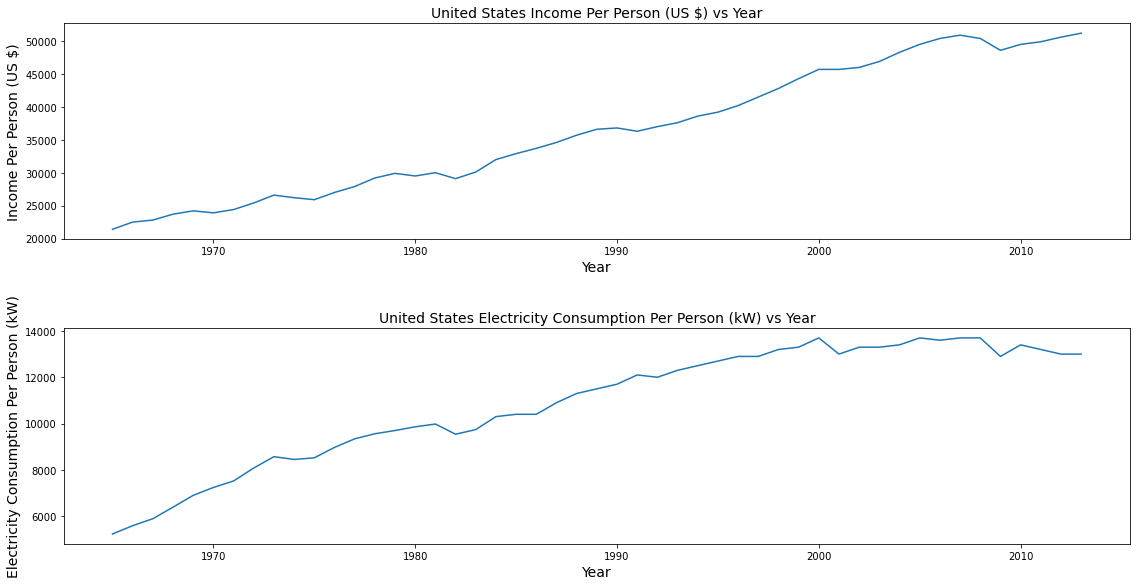

In [234]:
# Produce a 1D array of 2 subplots
fig, a = plt.subplots(2)

# Define the x-axis
x = np.arange(1965, 2014)
# Define attributes for the first subplot
a[0].plot(x, usa.income)
a[0].set_title("United States Income Per Person (US $) vs Year", fontsize=14)
a[0].set_xlabel("Year", fontsize=14)
a[0].set_ylabel("Income Per Person (US $)", fontsize=14)

# Add spacing between subplots
fig.tight_layout(h_pad=5)

# Define attributes for the second subplot
a[1].plot(x, usa.electricity_consumption)
a[1].set_title("United States Electricity Consumption Per Person (kW) vs Year", fontsize=14)
a[1].set_xlabel("Year", fontsize=14)
a[1].set_ylabel("Electricity Consumption Per Person (kW)", fontsize=14)

plt.show()

#### Research Question 3 Analysis
Here, we're trying to determine if an increase in the per capita income per person results in increased electricity usage per person? This may suggest increased income levels results in a individual purchasing more goods thereby resulting in increased electricity usage.

Above we've plotted subplots to compare these 2 variables over time for India, China and USA. There appears to be a moderate positive correlation between Income and Electricity Consumption.

For all subplots above, the trends between Income and Electricity consumption closely follow each other.

<a id='conclusions'></a>
## Conclusions
In this data investigation project we have looked at the economic performance across different countries (India, China, Japan and United States).

We have looked at:
* The GDP growth over time between all the aforementioned countries
* Analyzed the income growth over time between China and India and related it back to the country's economic growth
* Looked at the relationship between Income Per Person and Electricity Consumption Per Person between India, China, United States.

### Limitations in analysis
There were a few limitations in the analysis, such as:
* The data exploration was limited to: Electricity Consumption Per Person, Income Per Person and GDP.

* Originally, the intention was to also include more variables in the analysis, such as: Number of Cellphones earned per 100 people, % Internet users by country and the Total annual oil consumption per country. The reason the additional variables were not included in the analysis is due to the lack of sufficient data to be able to perform the analysis.

* The dataset does not include a 'Continent' column, so it was not possible to do analysis on a continent by continent basis, i.e. Asian countries experienced an overall GDP growth of 7% compared with that of Europe between the period of 1965 to 2013 etc.

* The dataset also does not include country population, this was not included due to lack of sufficient data. Otherwise, it would have been worthwhile to compare oil consumption of a country with growth in population etc.